# Chem 30324, Spring 2018 Homework 4
Due February 21, 2018

### In a “1-dimensional hydrogen atom”, an electron is confined to the positive x axis and attracted to a proton at the origin. The potential felt by the electron can be written as

$$V(x) =
  \begin{cases}
    -C\frac{1}{x}  & \quad      \text{if x} > \text{0}\\
    \infty         & \quad      \text{if x} \le \text{0}\\
  \end{cases}$$

### where $c = \frac{e^2}{4\pi\epsilon_0} = \frac{\hbar^2}{m_ea_0}$ is a bunch of constants with units energy times distance. In particular, $m_e$ is the electron mass and $a_0$ is the bohr radius, a convenient unit of length equal to 0.529 Å. It’s easiest to solve the problems below using the second set of constants. Further, the following equations are often of use in solving problems related to this system:

$$\int_0^\infty x^n\mathrm{e}^{-ax}\,\mathrm{d}x = \frac{n!}{a^{n+1}},\quad \frac{d}{dx}x\mathrm{e}^{-ax} = \mathrm{e}^{-ax}(1-ax),\quad \frac{d^2}{dx^2}x\mathrm{e}^{-ax} = a\mathrm{e}^{-ax}(ax-2)$$

### 1. Write down the time-independent Schrödinger equation for the 1-D H atom. Remember to include the domain of the equation.

The time-independent Schrödinger equation is $\hat{H}\Psi = E\Psi$. In a “1-dimensional hydrogen atom”, $\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}-\frac{c}{x}$, (x>0).

So the time-independent Schrödinger equation of this system is $-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\Psi-\frac{c}{x}\Psi = E\Psi$, (x>0).

### 2. Would $\phi(x) = e^{ikx}$ be an acceptable wavefunction for this system? Why or why not?

$\phi(x) = e^{ikx}$ is not an acceptable wavefunction for this system. According to Postulate 1 of Quantum Mechanics, a wavefunction is required to be square-integrable. In this case, $\int_0^\infty \phi(x)\ast\phi(x)dx = \infty$, $\phi(x)$ is not square-integrable and it can not be normalized.

### 3. Consider the candidate wavefunction $\Psi_1(x) = \frac{x}{a_0}e^{-x/a_0}$. Plot $V(x)$ and $\Psi_1(x)$. Be sure to label axes appropriately. ($Hint$: it is convenient to work in units of $a_0$. That is, make your plots against $x /a_0$ .)

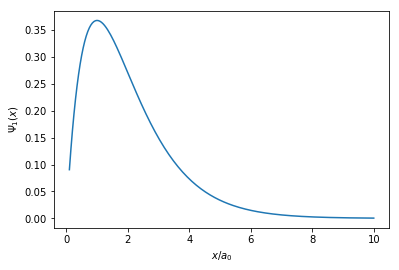

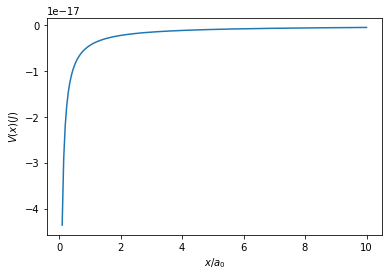

In [1]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.05457e-34 #J*s
me = 9.109e-31 # kg
a0 = 0.529e-10 # m

x = np.linspace(0.1,10,200)
Psi_1 = x*np.exp(-x) # replace x/a0 by x
V = -hbar**2/me/a0**2/x # replace x/a0 by x

plt.plot(x,Psi_1)
plt.xlabel('$x/a_0$')
plt.ylabel('$\Psi_1(x)$')
plt.show()
plt.plot(x,V)
plt.xlabel('$x/a_0$')
plt.ylabel('$V(x)(J)$')
plt.show()

### 4. Is $\Psi_1(x)$ normalized? If not, construct the normalized $\tilde{\Psi}_{1}(x)$ . It is ok to express you answer in terms of fundamental constants.

In [2]:
from sympy import * # import sympy for symbolic mathematics
x = symbols('x')
a0 = symbols('a0',positive=True)
a = integrate(((x/a0*exp(-x/a0))**2),(x,0,oo)) # integrate the square of wavefunction 
print (sqrt(1/a)) # normalization coefficient 

2/sqrt(a0)


$\Psi_1(x)$ is not normalized, the factor is $\frac{2}{\sqrt{a_0}}$, $\tilde{\Psi}_{1}(x) = \frac{2x}{a_0^{3/2}}e^{-x/a_0}$.

### 5. What is the most probable distance of the electron from the proton, in units of $a_0$?

In [10]:
print(solve(diff((2*x/a0**(3/2)*exp(-x/a0))**2,x),x)) # make the fist derivative of wavefunction squared equal to 0, then solve x

[0.0, a0]


There are two solutions, x = 0 is meaningless, x = $a_0$ is the most probable distance.

### 6. What is the probability of finding the electron further than $a_0$ from the proton?

In [11]:
a0 = 0.529e-10 # m
Psi_1 = 2*x/a0**(3/2)*exp(-x/a0) # normalized wavefunction
probability = integrate(Psi_1**2,(x,a0,oo))
print("The probability of finding the electron further than a0 from the proton is {:.3f}.".format(probability))

The probability of finding the electron further than a0 from the proton is 0.677.


### 7. If you measure the linear momentum of many electrons, all with the same wavefunction $\tilde{\Psi}_{1}(x)$ , will you get the same answer every time? What will you get on average? It is ok to express you answer in terms of fundamental constants.

Linear momentum operator is $\hat{p}_x = -i\hbar\frac{d}{dx}$.
$$\hat{p}_x\tilde{\Psi}_{1}(x) = -i\hbar\frac{d}{dx}\frac{2x}{a_0^{3/2}}e^{-x/a_0} = -i\hbar\frac{2}{a_0^{3/2}}(1-\frac{x}{a_0})e^{-x/a_0}$$ We cannot write the result in the form of constant*$\tilde{\Psi}_{1}(x)$, so $\tilde{\Psi}_{1}(x)$ is not an eigenfunction of $\hat{p}_x$. We will not get the same answer every time.

In [12]:
from sympy import * # import sympy for symbolic mathematics
x = symbols('x')
i,hbar,a0 = symbols('i,hbar,a0',positive=True)
Psi_1 = 2*x/a0**(3/2)*exp(-x/a0)
pPsi_1 = -i*hbar*2/a0**(3/2)*(1-x/a0)*exp(-x/a0)
print("The average of momentum is {}.".format(integrate(Psi_1*pPsi_1,(x,0,oo))))

The average of momentum is 0.


Makes sense. If average momentum was anything but 0, the particle would have to be moving towards infinity.

### 8. If you measure the total energies of many electrons, all with the same wavefunction $\tilde{\Psi}_{1}(x)$, will you get the same answer every time? What will you get on average? (*Hint*: It will help to express $V(x)$ in terms of $a_0$ , $\hbar$, and $m_e$ .)

Total energy operator is $\hat{H} = -\frac{\hbar^2}{2m_e}\frac{d^2}{dx^2}-\frac{\hbar^2}{m_ea_0x}$.
$$\hat{H}\tilde{\Psi}_{1}(x) = -\frac{\hbar^2}{2m_e}\frac{d^2}{dx^2}\tilde{\Psi}_{1}(x)-\frac{\hbar^2}{m_ea_0x}\tilde{\Psi}_{1}(x) = -\frac{\hbar^2}{2m_ea_0^2}\frac{2x}{a_0^{3/2}}e^{-x/a_0}$$ The result is in the form of constant*$\tilde{\Psi}_{1}(x)$, so $\tilde{\Psi}_{1}(x)$ is the eigenfunction of $\hat{H}$, we can get the same answer every time. The average is the constant $-\frac{\hbar^2}{2m_ea_0^2}$, which is called the eigenvalue of $\tilde{\Psi}_{1}(x)$ of the operator $\hat{H}$.

### 9. The normalized wavefunction $\tilde{\Psi}_{2}(x) = \frac{x}{\sqrt{2}a_0^{3/2}}(1-\frac{x}{2a_0})e^{-x/2a_0}$ is an eigenfunction of the one-dimensional H atom Schrödinger equation with eigenvalue $E_{2} = - \frac{\hbar^2}{8m_ea_0^2}$ . Plot $\tilde{\Psi}_{2}(x)$ . Are $\tilde{\Psi}_{1}(x)$ and $\tilde{\Psi}_{2}(x)$ orthogonal? (Be sure to justify your answer!)

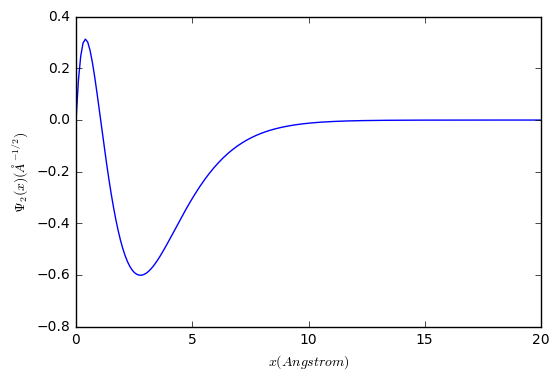

In [25]:
import numpy as np
import matplotlib.pyplot as plt

a0 = 0.529 # angstrom

x = np.linspace(0,20,200)
Psi_2 = x/2**0.5/a0**(3/2)*(1-x/2/a0)*np.exp(-x/2/a0) # normalized wavefunction
plt.plot(x,Psi_2) # plot the oringinal wavefunction
plt.xlabel('$x(Angstrom)$')
plt.ylabel('$\Psi_2(x)(\AA^{-1/2})$')
plt.show()

In [26]:
from sympy import * # import sympy for symbolic mathematics
x = symbols('x')
a0 = symbols('a0',positive=True)
Psi_1 = 2*x/a0**(3/2)*exp(-x/a0)
Psi_2 = x/2**0.5/a0**(3/2)*(1-x/2/a0)*exp(-x/2/a0)
print(integrate(Psi_1*Psi_2,(x,0,oo)))

0


The integral $\langle \tilde{\Psi}_{1}(x)\lvert\tilde{\Psi}_{2}(x)\rangle$ is equal to 0, which means the two wavefunctions are orthogonal.

### 10. Suppose an electron is in a superposition state described by $\xi(x) = \frac{1}{\sqrt{3}}(\tilde{\Psi}_{1}(x) + \sqrt{2}\tilde{\Psi}_{2}(x))$. If  you measure the total energies of many electrons, all with the same wavefunction $\xi(x)$, will you get the same answer every time? What will you get on average? It is ok to express you answer in terms of fundamental constants.

Total energy operator is $\hat{H}$. 
$$\hat{H}\xi(x) = \hat{H}[\frac{1}{\sqrt{3}}(\tilde{\Psi}_{1}(x) + \sqrt{2}\tilde{\Psi}_{2}(x))] = \frac{1}{\sqrt{3}}\hat{H}\tilde{\Psi}_{1}(x)+\frac{\sqrt{2}}{\sqrt{3}}\hat{H}\tilde{\Psi}_{2}(x)$$ 
$$= \frac{1}{\sqrt{3}}E_1\tilde{\Psi}_{1}(x)+\frac{\sqrt{2}}{\sqrt{3}}E_2\tilde{\Psi}_{2}(x)$$ 
$$= \frac{1}{\sqrt{3}}(-\frac{\hbar^2}{2m_ea_0^2})\tilde{\Psi}_{1}(x)+\frac{\sqrt{2}}{\sqrt{3}}(-\frac{\hbar^2}{8m_ea_0^2})\tilde{\Psi}_{2}(x)$$ 
The result is not in the form of constant*$\xi(x)$, so $\xi(x)$ is not the eigenfunction of $\hat{H}$, we can't get the same answer every time.

We can use "braket" notation to calculate the average value $\langle H\rangle$.
$$\langle H\rangle = \langle \xi(x)\lvert\hat{H}\rvert\xi(x)\rangle = \langle \frac{1}{\sqrt{3}}(\tilde{\Psi}_{1}(x) + \sqrt{2}\tilde{\Psi}_{2}(x))\lvert\hat{H}\rvert\frac{1}{\sqrt{3}}(\tilde{\Psi}_{1}(x) + \sqrt{2}\tilde{\Psi}_{2}(x))\rangle$$
$$= \frac{1}{3}\langle \tilde{\Psi}_{1}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{1}(x)\rangle+ \frac{\sqrt{2}}{3}\langle \tilde{\Psi}_{1}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{2}(x)\rangle + \frac{\sqrt{2}}{3}\langle \tilde{\Psi}_{2}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{1}(x)\rangle+\frac{2}{3}\langle \tilde{\Psi}_{2}(x)\lvert\hat{H}\rvert\tilde{\Psi}_{2}(x)\rangle$$
$$= \frac{1}{3}E_1+\frac{2}{3}E_2$$
$$= -\frac{\hbar^2}{4m_ea_0^2}$$

1/3 of the time we will measure $E_1$, 2/3 of the time $E_2$.

### 11. The uncertainties in the positions of an electron described by $\tilde{\Psi}_{1}(x)$ and $\tilde{\Psi}_{2}(x)$ can be shown to be $2^{1/2} a_{0}$ and $6^{1/2} a_{0}$, respectively. Contrast the uncertainties in their linear speeds.

The uncertainty principle is $\Delta x\Delta p\geq\frac{\hbar}{2}$. We also know $\Delta x_1 = 2^{1/2} a_{0}$, $\Delta x_2 = 6^{1/2} a_{0}$. The relationship between the uncertainties in linear speeds and the uncertainties in linear momentums is $\Delta p = m\Delta v$. So $\Delta v\geq\frac{\hbar}{2m\Delta x}$.

In [15]:
hbar = 1.05457e-34 #J*s
me = 9.109e-31 # kg
a0 = 0.529e-10 # m
dx1 = 2**0.5*a0 # m
dx2 = 6**0.5*a0 # m
dv1 = hbar/2/me/dx1 # m/s
dv2 = hbar/2/me/dx2 # m/s
print("The uncertainties in their linear speeds are {0:.3E} m/s and {1:.3E} m/s.".format(dv1,dv2))

The uncertainties in their linear speeds are 7.738E+05 m/s and 4.467E+05 m/s.


$\Delta x_1 <\Delta x_2$, according to the uncertainty principle, we get $\Delta v_1 >\Delta v_2$.